# K MEANS CLUSTERING
<hr style="height:5px;border-width:2;color:gray">

## Unsupervised Learning

As we know, in Supervised Learning models, where we have both input and output and our goal is to create a logic associating input and the output. However sometimes you may deal only with inputs which may have no defined outputs. This is called Unsupervised Learning.

For example,
<ul>
    <li>Dimensionality Reduction (Ex: PCA, tSNE)</li>
    <li>Clustering (Ex: K Means, Hierarchical Clustering, DBSCAN)</li>
</ul>
etc.
<br>
Here we'll be looking at the most basic clustering algorithm, K Means Clustering.

<hr style="height:2px;border-width:2;color:gray">

## Theory

### Introduction

K Means is one of the simplest well known unsupervised clustering algorithms. A <b>cluster</b> is a group of data points that are similar to each other in some way. Generally to find similarity, Euclidean distance between the features is used i.e, the data points which are closer to each other are more similar. 

In K means, <b>K</b> refers to <b>number of clusters</b>.

The main goal of K means is to find <b>K</b> points and call these the center of the clusters. After that each data point is assigned to cluster whose center is closest to the data point. The K Means Algorithm is used to find these centers.

<center><img src = "https://i2.wp.com/cmdlinetips.com/wp-content/uploads/2019/05/kmeans_data.png?resize=432%2C288"></center>

> In this image, the data points have two features and are plotted on the X and Y axis. The different clusters are denoted by different colours. As we can see, the points belonging to same cluster are closer to each other.<br><a href = "https://cmdlinetips.com/2019/05/k-means-clustering-in-python/">Image credits</a>

### Algorithm

Let $\{ v_1, v_2 \ldots v_m\}$ be $m$ data points that we need to cluster.

<b><u>Algorithm Steps</u></b>:<br>
<ol>
    <li>
        <b>Chose a suitable K value i.e, number of clusters.</b> 
    </li>
    <li>
        <b>Randomly chose K cluster centers</b>:<br>
        Randomly chose K data points and call them the cluster centers $\{C_1, C_2 \ldots C_K\}$.
    </li>
    <li>
        <b>Assign cluster to each data point</b>:<br>
        For each data point $v_i$ find the closest cluster center to it and assign $v_i$ to that cluster. The closeness between two points is measured by the Euclidean distance between the two points.
    </li>
    <li>
        <b>Recalculate the cluster centers</b>:
        Each data point has been assigned to a single cluster in the previous step. Now for each <u>cluster</u> (say $C_j$), calculate the mean of all the data points that belong to $C_j$. Reassign $C_j$ to this mean i.e,<br><br>
        $$C_j = mean(\{v_i \ | \  v_i \in C_j\})$$
    <br>
    </li>
    <li>
        Repeat the process from step 3 until maximum number of iterations is reached or cluster centers stop changing.
    </li>
</ol>

Since the final clusters depend on initially chosen cluster centers (which are chosen at random) the entire algorithm is applied multiple times to find the best results.

### Intuition

In the first step, we randomly chose K cluster centers. They are generally chosen as K random data points instead of random points in the entire space. After that, the algorithm moves the cluster centers closer and closer to the actual cluster centers in every iteration, until the cluster centers don't change anymore. However the final clusters will depend on initial random initialization and hence we run the algorithm multiple times to chose the best clusters.

The following image shows K Means at various steps.

<center><img src = "https://stanford.edu/~cpiech/cs221/img/kmeansViz.png"></center>

> <a href = "https://stanford.edu/~cpiech/cs221/handouts/kmeans.html">Image credits</a>

### Evaluation

Since K Means is an unsupervised learning algorithm, we can't measure how well the algorithm performs by comparing it to a true value. So, the clusters are said to be good if the <b>data points belonging to same cluster are close to each other</b> and <b>data points belonging to different clusters are far from each other</b>.

Therefore, a K Means model is evaluated using the sum of squared distances between every data point and its cluster center. The smaller the SSE (Sum of Squared Errors), the better the clustering. To find SSE, for each cluster find the sum of the squared distances between the data points that belong to that cluster and the cluster centers. Then add all these sums for the K clusters.

To chose the best clustering, run the K Means algorithm multiple times and chose the cluster center initialization that gives the lowest SSE.

### Chosing the best K Value

We can also use the SSE to find the best K value using a method called the <b>elbow method</b>. 

To do this, plot the SSE (by SSE we mean SSE for the best clustering) against K values. The SSE drops as K value increases (in fact, SSE is 0 when K is equal to number of data points). So the K value for which there is a maximum drop in SSE is the best estimate for number of clusters. After this maximum drop, the curve seems to slowly flatten.

<div class = "alert alert-block alert-info">
    <b>Note</b>: Sometimes this method may not work as it might be difficult to identify the elbow point.
</div>

<center><img src = "https://miro.medium.com/max/866/1*9z8erk4kvsnxkfv-QhsHZg.png"></center>

> In this image K = 2 causes maximum drop in SSE. Also notice how the curve tends to slowly flatten after K = 2. This methid is called elbow method because the curve looks like a human arm and the optimal value is the elbow point.<br>
<a href = "https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a">Image credits</a>

### Advantages and Disadvantages

#### Advantages
<ul>
    <li>It is fast and simple to understand.</li>
    <li>Works really well when clusters are distinct.</li>
</ul>

#### Disadvantages
<ul>
    <li>Need to manually chose K value.</li>
    <li>The algorithm may sometimes end up in local optima.</li>
    <li>The algorithm does not works very well only for circular clusters.</li>
</ul>

<hr style="height:2px;border-width:2;color:gray">

## Implementation

We can implement K Means clustering using Scikit Learn.

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Creating the dataset

An artificial cluster dataset can be created using sklearn. Also one more thing to notice is that <u>generally we don't do train test splits in clustering since we don't have any labels to test on.</u>

In [2]:
from sklearn.datasets import make_blobs

data,_ = make_blobs(200, n_features = 2, centers = 3, cluster_std = [1, 1.5, 2], random_state = 1234)
data.shape

(200, 2)

Let's plot the given data. First feature on X-axis and second feature on Y-axis.

In [3]:
data

array([[-0.12166832,  4.69388946],
       [-1.06368751,  6.15564758],
       [-0.19160188,  4.43165227],
       [-6.37354386,  2.26000001],
       [-0.30228148,  5.9869132 ],
       [ 8.36551066, -4.59306964],
       [-0.70009838,  5.68504351],
       [ 2.49283148, -5.1867435 ],
       [ 5.12284543, -0.68379156],
       [-5.35348376,  4.33570989],
       [ 6.38730069, -6.44819896],
       [-5.49405691,  0.62514819],
       [-5.3058937 ,  2.32008385],
       [-7.57158427,  2.34125722],
       [ 0.04915207,  4.12972989],
       [ 6.71127102, -5.91191051],
       [ 5.9542896 , -2.58112244],
       [-6.648935  ,  2.14315913],
       [-5.13581026,  0.04172179],
       [-1.65910581,  6.45789602],
       [-0.62863919,  7.04331911],
       [-6.50368836,  2.44429379],
       [ 5.73534088, -4.62211352],
       [-5.40224226,  3.42709526],
       [-0.475822  ,  4.88754725],
       [ 3.98543955, -5.23216946],
       [-0.19408362,  7.18345378],
       [-5.94264845,  1.28951631],
       [ 0.79125067,

In [4]:
data[:,0]

array([-0.12166832, -1.06368751, -0.19160188, -6.37354386, -0.30228148,
        8.36551066, -0.70009838,  2.49283148,  5.12284543, -5.35348376,
        6.38730069, -5.49405691, -5.3058937 , -7.57158427,  0.04915207,
        6.71127102,  5.9542896 , -6.648935  , -5.13581026, -1.65910581,
       -0.62863919, -6.50368836,  5.73534088, -5.40224226, -0.475822  ,
        3.98543955, -0.19408362, -5.94264845,  0.79125067,  3.06831509,
       -4.84850538, -5.48895499,  8.46188367, -6.00508145, -1.72575104,
        8.74500165,  7.5915021 , -1.2101088 ,  5.54881836, -3.45511984,
       -0.58504563,  5.8623069 ,  7.4484019 ,  0.1832723 ,  9.18419456,
       -0.77592553, -1.82727457, -5.86164214, -3.1169246 ,  7.11882123,
       -1.72478732, -1.48715058,  2.72636829, -4.46722778,  6.76968472,
        0.6631474 ,  0.34100455,  4.23193652, -5.81559066,  6.17667881,
        3.35847417, -1.86720249,  8.16538266, -1.48109393, -1.03592031,
        5.49843678,  3.29031423,  0.44413351,  7.24161207, -5.01

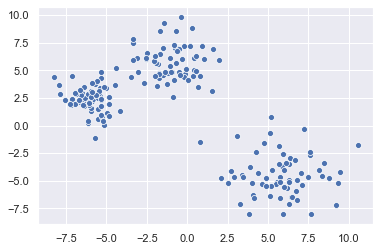

In [5]:
sns.scatterplot(data[:,0], data[:,1])

From the figure we can make out 3 clusters.

### Creating the model

Create a K Means clustering model using sklearn. After fitting the model, plot the data points and distinguish the clusters by color. Also plot the cluster centers.

In [6]:
from sklearn.cluster import KMeans

In [7]:
kmeans= KMeans(n_clusters=2,init='k-means++')
y=kmeans.fit_predict(data)

In [8]:
centers = kmeans.cluster_centers_

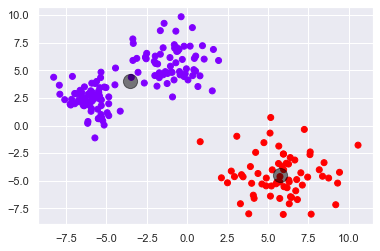

In [9]:
plt.scatter(data[:,0], data[:,1],c=y,cmap='rainbow')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

#### Experimentation

The KMeans class abstracts a lot of information. Try looking at all the attributes of the class and try changing them. For example, <code>init</code> is set to "k-means++" initially which intelligently choses initial clusters, try changing it to "random"; <code>n_init</code> is set to 10 by default which means the algorithm is run 10 times and the best one is chosen automatically, try changing it to 1 and run the model multiple times.

Also here we know that K = 3 because this data is artificially generated. Try fitting the model for different K values and see how KMeans tries to fit for those K values.

### Elbow plot

Since this data is 2 dimensional we could easily figure out that there were 3 clusters. However in case of high dimensional data we can use an elbow plot to figure out the number of clusters.

Plot an elbow plot for this data. (<b>Hint</b>: You can use sklearn to calculate SSE for each K value)

In [10]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)    

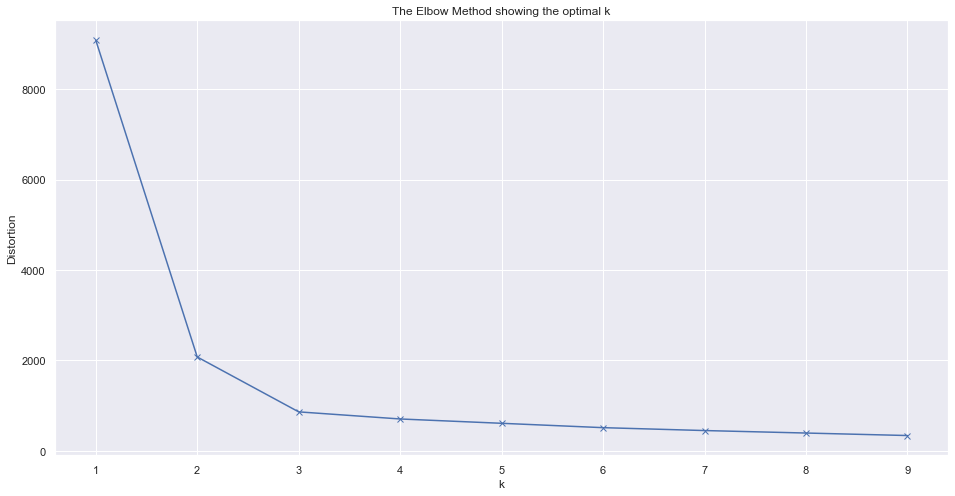

In [11]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

If you see the elbow plot, you can notice that the elbow point is at K = 3. Eventhough K = 2 has a very high drop, the curve starts to flatten after K = 3 and hence it is the elbow point.

#### Experimentation

You can try to experiment by changing the number of clusters in <code>make_blobs</code> and see how KMeans performs on different data. Also try to see if Standardization has any effect on KMeans.

<hr style="height:2px;border-width:2;color:gray">

### Resources for further learning

<ul>
    <li>Checkout this <a href = "https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a">article</a> for more information on K Means.</li>
  

<hr style="height:5px;border-width:2;color:gray">